<a href="https://colab.research.google.com/github/AidanFeldman/MAT421/blob/main/ModuleBSection17_4_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.4 Lagrange Polynomial Interpolation
Instead of linear interpolation, which creates a line connecting the points of the function, and cubic interpolation, which creates a polynomial connecting individual sets of points, we can also use Lagrange polynomial interpolation, which connects all the points of a set with a single polynomial known as a Lagrange polynomial.

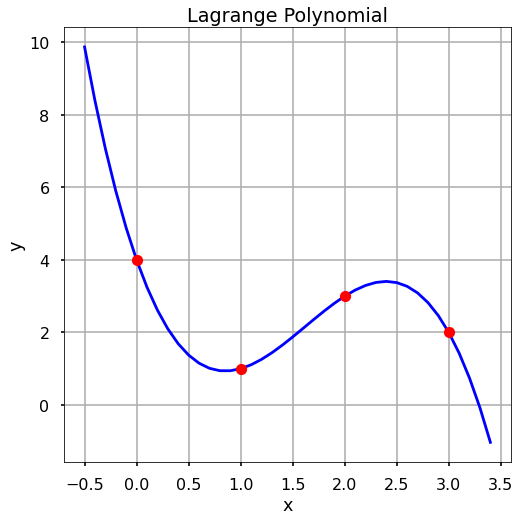

In [15]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = [0, 1, 2, 3]
y = [4, 1, 3, 2]

x_new = np.arange(-0.5, 3.5, 0.1)

f = lagrange(x, y) #By using the lagrange function of scipy, we can find a single function that interpolates across the whole dataset
fig = plt.figure(figsize = (8,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 7.5 Newton’s Polynomial Interpolation
Newton's polynomial interpolation is another way to interpolate a single function for a whole data set.

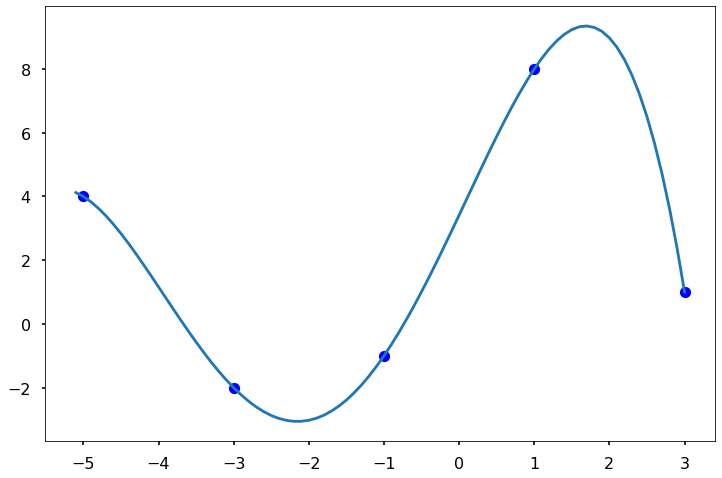

In [18]:
def divided_diff(x, y):
    # Establishes a function to calculate the divided differences
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x): #Creates a function to evaluate the newton polynomial for some given x
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([-5, -3, -1, 1, 3])
y = np.array([4, -2, -1, 8,1])
a_s = divided_diff(x, y)[0, :] # Retrieve the divided difference coef

x_new = np.arange(-5.1, 3.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)